# Install packages

In [2]:
!pip install mlflow

# Import Library

In [3]:
# 📦 Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score , confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow
import mlflow.sklearn
from mlflow.models.signature import infer_signature

# Load Dataset

In [4]:
# prompt: load dataset form drive

df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv', header=None)
df.head(2)

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [5]:
df.columns = [
        "Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
        "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"
    ]
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [6]:
cols_to_fix = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[cols_to_fix] = df[cols_to_fix].replace(0, np.nan)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [9]:
numerical_cols = df.select_dtypes(include=['number']).columns

# Create a pipeline with SimpleImputer
imputer_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Fit and transform the numerical columns of your DataFrame
df[numerical_cols] = imputer_pipeline.fit_transform(df[numerical_cols])

# Verify that the missing values have been imputed
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


# Train-Test Split

In [10]:
df['Outcome'] = df['Outcome'].astype(int)

In [11]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Standard Scaling

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize features for models like SVM, Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
print("--- Before Logistic Regression Fit ---")
print("Data type of y_train:", type(y_train))
print("Data type of y_train[0]:", type(y_train.iloc[0]))
print("Unique values in y_train:", y_train.unique())
print("Number of positive samples in y_train:", y_train.sum())
print("Number of negative samples in y_train:", len(y_train) - y_train.sum())
print("---------------------------------------")


--- Before Logistic Regression Fit ---
Data type of y_train: <class 'pandas.core.series.Series'>
Data type of y_train[0]: <class 'numpy.int64'>
Unique values in y_train: [0 1]
Number of positive samples in y_train: 214
Number of negative samples in y_train: 400
---------------------------------------


# Model Training and Evaluation

In [14]:
results = {}
    
# Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
results['Logistic Regression'] = {
    'accuracy': accuracy_score(y_test, lr_pred),
    'precision': precision_score(y_test, lr_pred),
    'recall': recall_score(y_test, lr_pred),
    'f1': f1_score(y_test, lr_pred)
}

# Decision Tree
dt_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
results['Decision Tree'] = {
    'accuracy': accuracy_score(y_test, dt_pred),
    'precision': precision_score(y_test, dt_pred),
    'recall': recall_score(y_test, dt_pred),
    'f1': f1_score(y_test, dt_pred)
}

# Random Forest
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
results['Random Forest'] = {
    'accuracy': accuracy_score(y_test, rf_pred),
    'precision': precision_score(y_test, rf_pred),
    'recall': recall_score(y_test, rf_pred),
    'f1': f1_score(y_test, rf_pred)
}

# SVM
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)
svm_pred = svm_model.predict(X_test_scaled)
results['SVM'] = {
    'accuracy': accuracy_score(y_test, svm_pred),
    'precision': precision_score(y_test, svm_pred),
    'recall': recall_score(y_test, svm_pred),
    'f1': f1_score(y_test, svm_pred)
}

# K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train_scaled, y_train)
knn_pred = knn_model.predict(X_test_scaled)
results['K-Nearest Neighbors'] = {
    'accuracy': accuracy_score(y_test, knn_pred),
    'precision': precision_score(y_test, knn_pred),
    'recall': recall_score(y_test, knn_pred),
    'f1': f1_score(y_test, knn_pred)
}

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)
results['Naive Bayes'] = {
    'accuracy': accuracy_score(y_test, nb_pred),
    'precision': precision_score(y_test, nb_pred),
    'recall': recall_score(y_test, nb_pred),
    'f1': f1_score(y_test, nb_pred)
}


# Results and Graphical Representation

In [15]:
# Convert dictionary to DataFrame for plotting
results_df = pd.DataFrame(results).T
results_df

,accuracy,precision,recall,f1
Logistic Regression,0.694805,0.577778,0.481481,0.525253
Decision Tree,0.629870,0.471698,0.462963,0.467290
Random Forest,0.772727,0.711111,0.592593,0.646465
SVM,0.733766,0.644444,0.537037,0.585859
K-Nearest Neighbors,0.746753,0.647059,0.611111,0.628571
Naive Bayes,0.694805,0.557377,0.629630,0.591304


/tmp/ipykernel_471/1735400792.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df[metric], ax=ax, palette="Set2")
/tmp/ipykernel_471/1735400792.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df[metric], ax=ax, palette="Set2")
/tmp/ipykernel_471/1735400792.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df[metric], ax=ax, palette="Set2")
/tmp/ipykernel_471/1735400792.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecat

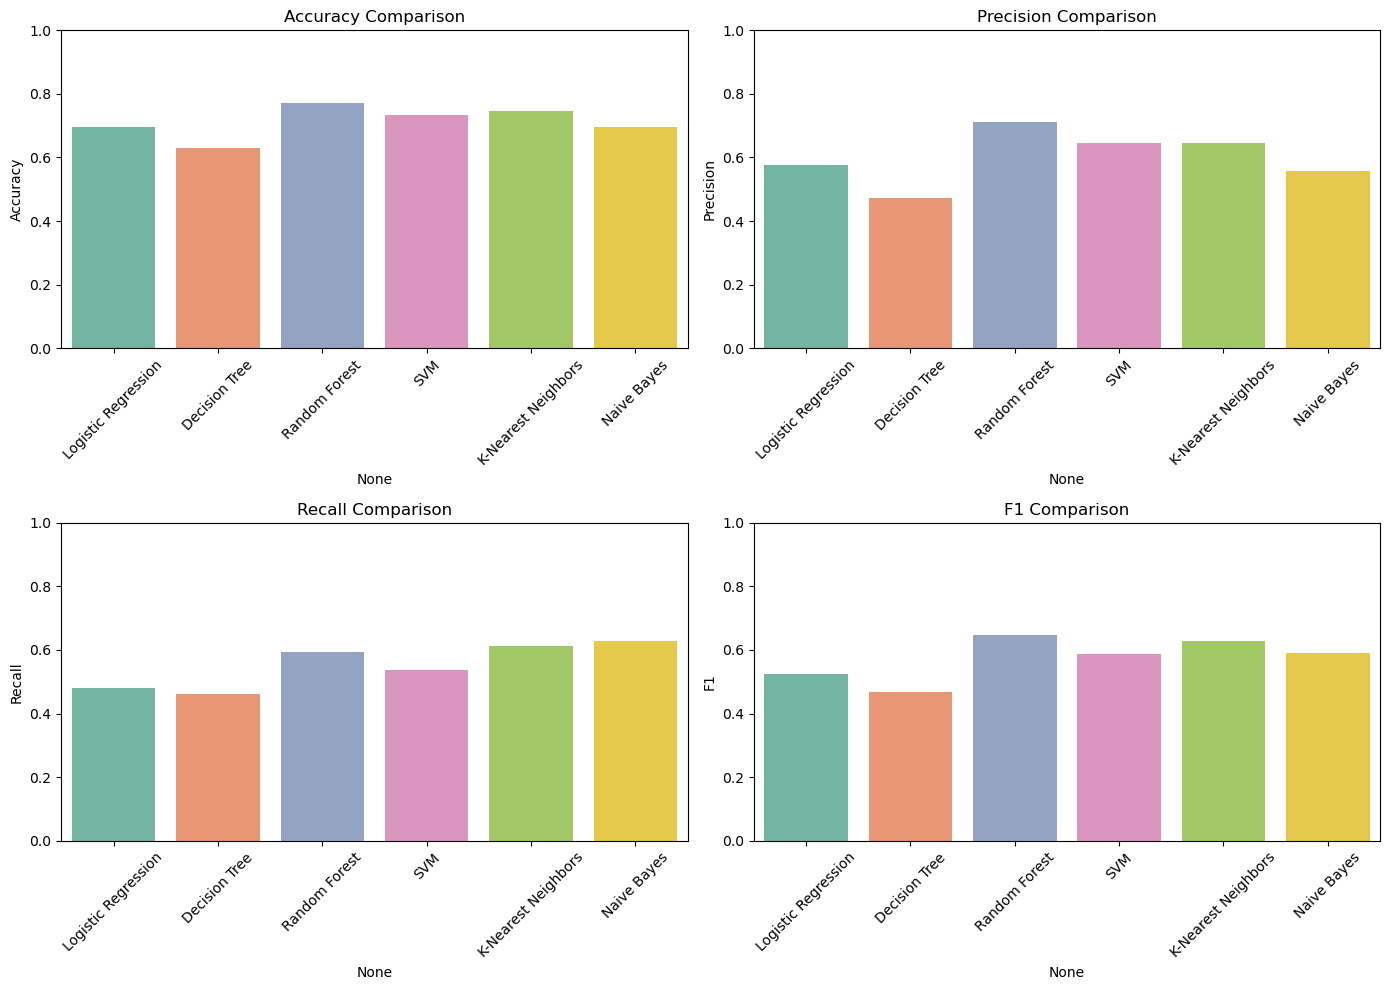

                     accuracy  precision    recall        f1
Logistic Regression  0.694805   0.577778  0.481481  0.525253
Decision Tree        0.629870   0.471698  0.462963  0.467290
Random Forest        0.772727   0.711111  0.592593  0.646465
SVM                  0.733766   0.644444  0.537037  0.585859
K-Nearest Neighbors  0.746753   0.647059  0.611111  0.628571
Naive Bayes          0.694805   0.557377  0.629630  0.591304


In [16]:
# Plotting the comparison of metrics
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
metrics = ['accuracy', 'precision', 'recall', 'f1']
for i, metric in enumerate(metrics):
    ax = axes[i//2][i%2]
    sns.barplot(x=results_df.index, y=results_df[metric], ax=ax, palette="Set2")
    ax.set_title(f'{metric.capitalize()} Comparison')
    ax.set_ylabel(metric.capitalize())
    ax.set_ylim(0, 1)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print final metrics table
print(results_df)

# MLflow Tracking

In [17]:
mlflow.set_tracking_uri("http://mlflow:5000")
mlflow.set_experiment("Pima Indians Diabetes Classification")
class_names = ["Non-Diabetic", "Diabetic"]


2025/06/02 09:40:43 INFO mlflow.tracking.fluent: Experiment with name 'Pima Indians Diabetes Classification' does not exist. Creating a new experiment.


In [18]:
with mlflow.start_run(run_name="Logistic Regression"):
    lr_model = LogisticRegression(max_iter=1000, random_state=42)
    lr_model.fit(X_train_scaled, y_train)
    lr_pred = lr_model.predict(X_test_scaled)
    acc = accuracy_score(y_test, lr_pred)
    prec = precision_score(y_test, lr_pred)
    rec = recall_score(y_test, lr_pred)
    f1 = f1_score(y_test, lr_pred)
    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("precision", prec)
    mlflow.log_metric("recall", rec)
    mlflow.log_metric("f1_score", f1)
    mlflow.sklearn.log_model(lr_model, "logistic_regression_model")
    results["Logistic Regression"] = {'accuracy': acc, 'precision': prec, 'recall': rec, 'f1': f1}

    cm = confusion_matrix(y_test, lr_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix - Logistic Regression')
    mlflow.log_figure(plt.gcf(), "confusion_matrix_logistic_regression.png")
    plt.close()

2025/06/02 09:40:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Logistic Regression at: http://mlflow:5000/#/experiments/766733439696880257/runs/4f45461d057b432ea0762742c7869849
🧪 View experiment at: http://mlflow:5000/#/experiments/766733439696880257


In [19]:
# Decision Tree
with mlflow.start_run(run_name="Decision Tree"):
    dt_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
    dt_model.fit(X_train, y_train)
    dt_pred = dt_model.predict(X_test)
    acc = accuracy_score(y_test, dt_pred)
    prec = precision_score(y_test, dt_pred)
    rec = recall_score(y_test, dt_pred)
    f1 = f1_score(y_test, dt_pred)
    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("precision", prec)
    mlflow.log_metric("recall", rec)
    mlflow.log_metric("f1_score", f1)
    mlflow.sklearn.log_model(dt_model, "decision_tree_model")
    results["Decision Tree"] = {'accuracy': acc, 'precision': prec, 'recall': rec, 'f1': f1}

    cm = confusion_matrix(y_test, dt_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix - Decision Tree')
    mlflow.log_figure(plt.gcf(), "confusion_matrix_decision_tree.png")
    plt.close()

2025/06/02 09:41:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Decision Tree at: http://mlflow:5000/#/experiments/766733439696880257/runs/d387ea37f01b4c4a98f3b4e34a36d40b
🧪 View experiment at: http://mlflow:5000/#/experiments/766733439696880257


In [20]:
# Random Forest
with mlflow.start_run(run_name="Random Forest"):
    rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
    rf_model.fit(X_train, y_train)
    rf_pred = rf_model.predict(X_test)
    acc = accuracy_score(y_test, rf_pred)
    prec = precision_score(y_test, rf_pred)
    rec = recall_score(y_test, rf_pred)
    f1 = f1_score(y_test, rf_pred)
    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("precision", prec)
    mlflow.log_metric("recall", rec)
    mlflow.log_metric("f1_score", f1)
    mlflow.sklearn.log_model(rf_model, "random_forest_model")
    results["Random Forest"] = {'accuracy': acc, 'precision': prec, 'recall': rec, 'f1': f1}

    cm = confusion_matrix(y_test, rf_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix - Random Forest')
    mlflow.log_figure(plt.gcf(), "confusion_matrix_random_forest.png")
    plt.close()

2025/06/02 09:41:07 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Random Forest at: http://mlflow:5000/#/experiments/766733439696880257/runs/59c72abd572c409abf8bd7b1856cd6a0
🧪 View experiment at: http://mlflow:5000/#/experiments/766733439696880257


In [21]:
# SVM
with mlflow.start_run(run_name="SVM"):
    svm_model = SVC(probability=True, random_state=42)
    svm_model.fit(X_train_scaled, y_train)
    svm_pred = svm_model.predict(X_test_scaled)
    acc = accuracy_score(y_test, svm_pred)
    prec = precision_score(y_test, svm_pred)
    rec = recall_score(y_test, svm_pred)
    f1 = f1_score(y_test, svm_pred)
    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("precision", prec)
    mlflow.log_metric("recall", rec)
    mlflow.log_metric("f1_score", f1)
    mlflow.sklearn.log_model(svm_model, "svm_model")
    results["SVM"] = {'accuracy': acc, 'precision': prec, 'recall': rec, 'f1': f1}

    cm = confusion_matrix(y_test, svm_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix - SVM')
    mlflow.log_figure(plt.gcf(), "confusion_matrix_svm.png")
    plt.close()

2025/06/02 09:41:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run SVM at: http://mlflow:5000/#/experiments/766733439696880257/runs/0f426f548c234ab18201e9b6cbff13c8
🧪 View experiment at: http://mlflow:5000/#/experiments/766733439696880257


In [22]:
# K-Nearest Neighbors
with mlflow.start_run(run_name="K-Nearest Neighbors"):
    knn_model = KNeighborsClassifier(n_neighbors=7)
    knn_model.fit(X_train_scaled, y_train)
    knn_pred = knn_model.predict(X_test_scaled)
    acc = accuracy_score(y_test, knn_pred)
    prec = precision_score(y_test, knn_pred)
    rec = recall_score(y_test, knn_pred)
    f1 = f1_score(y_test, knn_pred)
    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("precision", prec)
    mlflow.log_metric("recall", rec)
    mlflow.log_metric("f1_score", f1)
    mlflow.sklearn.log_model(knn_model, "knn_model")
    results["K-Nearest Neighbors"] = {'accuracy': acc, 'precision': prec, 'recall': rec, 'f1': f1}

    cm = confusion_matrix(y_test, knn_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix - K-Nearest Neighbors')
    mlflow.log_figure(plt.gcf(), "confusion_matrix_knn.png")
    plt.close()

2025/06/02 09:41:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run K-Nearest Neighbors at: http://mlflow:5000/#/experiments/766733439696880257/runs/97750fa2809b4ba8b1eb1094cc69e947
🧪 View experiment at: http://mlflow:5000/#/experiments/766733439696880257


In [23]:
# Naive Bayes
with mlflow.start_run(run_name="Naive Bayes"):
    nb_model = GaussianNB()
    nb_model.fit(X_train, y_train)
    nb_pred = nb_model.predict(X_test)
    acc = accuracy_score(y_test, nb_pred)
    prec = precision_score(y_test, nb_pred)
    rec = recall_score(y_test, nb_pred)
    f1 = f1_score(y_test, nb_pred)
    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("precision", prec)
    mlflow.log_metric("recall", rec)
    mlflow.log_metric("f1_score", f1)
    mlflow.sklearn.log_model(nb_model, "naive_bayes_model")
    results["Naive Bayes"] = {'accuracy': acc, 'precision': prec, 'recall': rec, 'f1': f1}

    cm = confusion_matrix(y_test, nb_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix - Naive Bayes')
    mlflow.log_figure(plt.gcf(), "confusion_matrix_naive_bayes.png")
    plt.close()

2025/06/02 09:41:29 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Naive Bayes at: http://mlflow:5000/#/experiments/766733439696880257/runs/69b441197e5347d88ceb9886d4fecbe1
🧪 View experiment at: http://mlflow:5000/#/experiments/766733439696880257


In [24]:
# Print the results
print("\n--- Model Performance ---")
for model_name, metrics in results.items():
    print(f"{model_name:<20} Accuracy: {metrics['accuracy']:.6f} Precision: {metrics['precision']:.6f} Recall: {metrics['recall']:.6f} F1: {metrics['f1']:.6f}")



--- Model Performance ---
Logistic Regression  Accuracy: 0.694805 Precision: 0.577778 Recall: 0.481481 F1: 0.525253
Decision Tree        Accuracy: 0.629870 Precision: 0.471698 Recall: 0.462963 F1: 0.467290
Random Forest        Accuracy: 0.772727 Precision: 0.711111 Recall: 0.592593 F1: 0.646465
SVM                  Accuracy: 0.733766 Precision: 0.644444 Recall: 0.537037 F1: 0.585859
K-Nearest Neighbors  Accuracy: 0.746753 Precision: 0.647059 Recall: 0.611111 F1: 0.628571
Naive Bayes          Accuracy: 0.694805 Precision: 0.557377 Recall: 0.629630 F1: 0.591304


# 3feature-5feature-Allfeature Evaluation for MLFLOW

In [25]:
from sklearn.feature_selection import SelectKBest, f_classif

if mlflow.active_run():
    mlflow.end_run()

with mlflow.start_run(run_name="Pima Diabetes Analysis"):
    results_comparison = {}
    feature_sets = {'3 Features': 3, '5 Features': 5, 'All Features': X_train.shape[1]}
    models = {
        'Naive Bayes': GaussianNB(),
        'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=7),
        'Decision Tree': DecisionTreeClassifier(criterion='entropy', random_state=42),
        'Random Forest': RandomForestClassifier(n_estimators=50, random_state=42),
        'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
        'SVM': SVC(probability=True, random_state=42)
    }

    for fs_name, n_features in feature_sets.items():
        mlflow.set_tag("feature_set", fs_name)
        print(f"\n--- Evaluating with {fs_name} ---")

        if fs_name != 'All Features':
            selector = SelectKBest(score_func=f_classif, k=n_features)
            X_train_selected = selector.fit_transform(X_train, y_train)
            X_test_selected = selector.transform(X_test)

            scaler_fs = StandardScaler()
            X_train_scaled = scaler_fs.fit_transform(X_train_selected)
            X_test_scaled = scaler_fs.transform(X_test_selected)
        else:
            scaler_fs = StandardScaler()
            X_train_scaled = scaler_fs.fit_transform(X_train)
            X_test_scaled = scaler_fs.transform(X_test)
            X_train_selected = X_train
            X_test_selected = X_test

        results_comparison[fs_name] = {}

        for model_name, model in models.items():
            with mlflow.start_run(run_name=f"{model_name} - {fs_name}", nested=True):
                mlflow.log_param("n_features", n_features)
                mlflow.log_param("feature_set_name", fs_name)
                mlflow.log_param("model_name", model_name)

                try:
                    if model_name in ['Logistic Regression', 'SVM', 'K-Nearest Neighbors']:
                        model.fit(X_train_scaled, y_train)
                        y_pred = model.predict(X_test_scaled)
                    else:
                        model.fit(X_train_selected, y_train)
                        y_pred = model.predict(X_test_selected)

                    acc = accuracy_score(y_test, y_pred)
                    prec = precision_score(y_test, y_pred)
                    rec = recall_score(y_test, y_pred)
                    f1 = f1_score(y_test, y_pred)

                    mlflow.log_metric("accuracy", acc)
                    mlflow.log_metric("precision", prec)
                    mlflow.log_metric("recall", rec)
                    mlflow.log_metric("f1_score", f1)
                    mlflow.sklearn.log_model(model, f"{model_name.replace(' ', '_')}_{fs_name.replace(' ', '_')}")

                    cm = confusion_matrix(y_test, y_pred)
                    plt.figure(figsize=(8, 6))
                    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                                xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
                    plt.xlabel('Predicted Label')
                    plt.ylabel('True Label')
                    plt.title(f'Confusion Matrix - {model_name} - {fs_name}')
                    mlflow.log_figure(plt.gcf(), f"confusion_matrix_{model_name.replace(' ', '_')}_{fs_name.replace(' ', '_')}.png")
                    plt.close()

                    if fs_name not in results_comparison:
                        results_comparison[fs_name] = {}
                    results_comparison[fs_name][model_name] = {
                        'accuracy': acc,
                        'precision': prec,
                        'recall': rec,
                        'f1': f1
                    }

                except Exception as e:
                    print(f"Error during model evaluation ({model_name} - {fs_name}): {e}")

    # --- Performance Comparison Across Feature Sets ---
    print("\n--- Performance Comparison Across Feature Sets ---")
    for metric in ['accuracy', 'precision', 'recall', 'f1']:
        print(f"\n--- {metric.capitalize()} ---")
        metric_data = {}
        for fs_name in feature_sets:
            metric_data[fs_name] = {}
            for model_name in models:
                if fs_name in results_comparison and model_name in results_comparison[fs_name] and metric in results_comparison[fs_name][model_name]:
                    metric_data[fs_name][model_name] = results_comparison[fs_name][model_name][metric]
                else:
                    metric_data[fs_name][model_name] = float('nan') # Handle missing data

        df_metric = pd.DataFrame(metric_data)
        print(df_metric)

        # Generate and log the comparison plot to MLflow
        plt.figure(figsize=(12, 7))
        df_metric.plot(kind='bar', figsize=(12, 7))
        plt.title(f'{metric.capitalize()} Comparison Across Feature Sets')
        plt.ylabel(metric.capitalize())
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        mlflow.log_figure(plt.gcf(), f"{metric}_comparison_across_feature_sets.png")
        plt.close()


--- Evaluating with 3 Features ---


2025/06/02 09:41:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Naive Bayes - 3 Features at: http://mlflow:5000/#/experiments/766733439696880257/runs/5b0e951aebc5425383e732cb8c928957
🧪 View experiment at: http://mlflow:5000/#/experiments/766733439696880257


2025/06/02 09:41:48 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run K-Nearest Neighbors - 3 Features at: http://mlflow:5000/#/experiments/766733439696880257/runs/ba6a22d5d12d4005bb7c06ac07137a8e
🧪 View experiment at: http://mlflow:5000/#/experiments/766733439696880257


2025/06/02 09:41:55 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Decision Tree - 3 Features at: http://mlflow:5000/#/experiments/766733439696880257/runs/799658bb47594f468540190824ab8b39
🧪 View experiment at: http://mlflow:5000/#/experiments/766733439696880257


2025/06/02 09:42:03 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Random Forest - 3 Features at: http://mlflow:5000/#/experiments/766733439696880257/runs/e86fcd5391f1461ba4244f29430fcdd9
🧪 View experiment at: http://mlflow:5000/#/experiments/766733439696880257


2025/06/02 09:42:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Logistic Regression - 3 Features at: http://mlflow:5000/#/experiments/766733439696880257/runs/1b8a3626c4944ee6b588959e6505c503
🧪 View experiment at: http://mlflow:5000/#/experiments/766733439696880257


2025/06/02 09:42:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run SVM - 3 Features at: http://mlflow:5000/#/experiments/766733439696880257/runs/b58161456a9b4c26b5304a8da3955468
🧪 View experiment at: http://mlflow:5000/#/experiments/766733439696880257

--- Evaluating with 5 Features ---


2025/06/02 09:42:25 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Naive Bayes - 5 Features at: http://mlflow:5000/#/experiments/766733439696880257/runs/a7d1602220404fd582ef56f551a694be
🧪 View experiment at: http://mlflow:5000/#/experiments/766733439696880257


2025/06/02 09:42:33 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run K-Nearest Neighbors - 5 Features at: http://mlflow:5000/#/experiments/766733439696880257/runs/5e9cace3e81343c08b473a99339ad506
🧪 View experiment at: http://mlflow:5000/#/experiments/766733439696880257


2025/06/02 09:42:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Decision Tree - 5 Features at: http://mlflow:5000/#/experiments/766733439696880257/runs/70ab7f9af9d04720b48b6fc243d44707
🧪 View experiment at: http://mlflow:5000/#/experiments/766733439696880257


2025/06/02 09:42:46 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Random Forest - 5 Features at: http://mlflow:5000/#/experiments/766733439696880257/runs/16ed342fe1bf41569b2f0d77aa680389
🧪 View experiment at: http://mlflow:5000/#/experiments/766733439696880257


2025/06/02 09:42:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Logistic Regression - 5 Features at: http://mlflow:5000/#/experiments/766733439696880257/runs/e5cc14f04e0c4693b397e4042921ca11
🧪 View experiment at: http://mlflow:5000/#/experiments/766733439696880257


2025/06/02 09:42:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run SVM - 5 Features at: http://mlflow:5000/#/experiments/766733439696880257/runs/e1f48bfbdfad42448b565c7e744d2d2e
🧪 View experiment at: http://mlflow:5000/#/experiments/766733439696880257

--- Evaluating with All Features ---


2025/06/02 09:43:04 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Naive Bayes - All Features at: http://mlflow:5000/#/experiments/766733439696880257/runs/5ab31ede2bdd41eabd03138241466388
🧪 View experiment at: http://mlflow:5000/#/experiments/766733439696880257


2025/06/02 09:43:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run K-Nearest Neighbors - All Features at: http://mlflow:5000/#/experiments/766733439696880257/runs/3bfa31f6cb244470bf49c17717a8193a
🧪 View experiment at: http://mlflow:5000/#/experiments/766733439696880257


2025/06/02 09:43:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Decision Tree - All Features at: http://mlflow:5000/#/experiments/766733439696880257/runs/e52df51999334b0b944641755043de13
🧪 View experiment at: http://mlflow:5000/#/experiments/766733439696880257


2025/06/02 09:43:23 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Random Forest - All Features at: http://mlflow:5000/#/experiments/766733439696880257/runs/5073f633cc44493492b67991ab89a80a
🧪 View experiment at: http://mlflow:5000/#/experiments/766733439696880257


2025/06/02 09:43:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Logistic Regression - All Features at: http://mlflow:5000/#/experiments/766733439696880257/runs/8b431782cdb542e484b9ee5a02121e95
🧪 View experiment at: http://mlflow:5000/#/experiments/766733439696880257


2025/06/02 09:43:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run SVM - All Features at: http://mlflow:5000/#/experiments/766733439696880257/runs/721194667dc14a67ab34c097c1981801
🧪 View experiment at: http://mlflow:5000/#/experiments/766733439696880257

--- Performance Comparison Across Feature Sets ---

--- Accuracy ---
                     3 Features  5 Features  All Features
Naive Bayes            0.688312    0.688312      0.694805
K-Nearest Neighbors    0.733766    0.727273      0.746753
Decision Tree          0.655844    0.655844      0.629870
Random Forest          0.688312    0.759740      0.772727
Logistic Regression    0.720779    0.720779      0.694805
SVM                    0.701299    0.707792      0.733766

--- Precision ---
                     3 Features  5 Features  All Features
Naive Bayes            0.568182    0.555556      0.557377
K-Nearest Neighbors    0.651163    0.611111      0.647059
Decision Tree          0.511111    0.508772      0.471698
Random Forest          0.568182    0.654545      0.711111
Logistic Regressi

<Figure size 1200x700 with 0 Axes>

<Figure size 1200x700 with 0 Axes>

<Figure size 1200x700 with 0 Axes>

<Figure size 1200x700 with 0 Axes>

# 3feature-5feature-Allfeature Evaluation plotting for Notebook


--- Performance Comparison Across Feature Sets ---

--- Accuracy ---
                     3 Features  5 Features  All Features
Naive Bayes            0.688312    0.688312      0.694805
K-Nearest Neighbors    0.733766    0.727273      0.746753
Decision Tree          0.655844    0.655844      0.629870
Random Forest          0.688312    0.759740      0.772727
Logistic Regression    0.720779    0.720779      0.694805
SVM                    0.701299    0.707792      0.733766


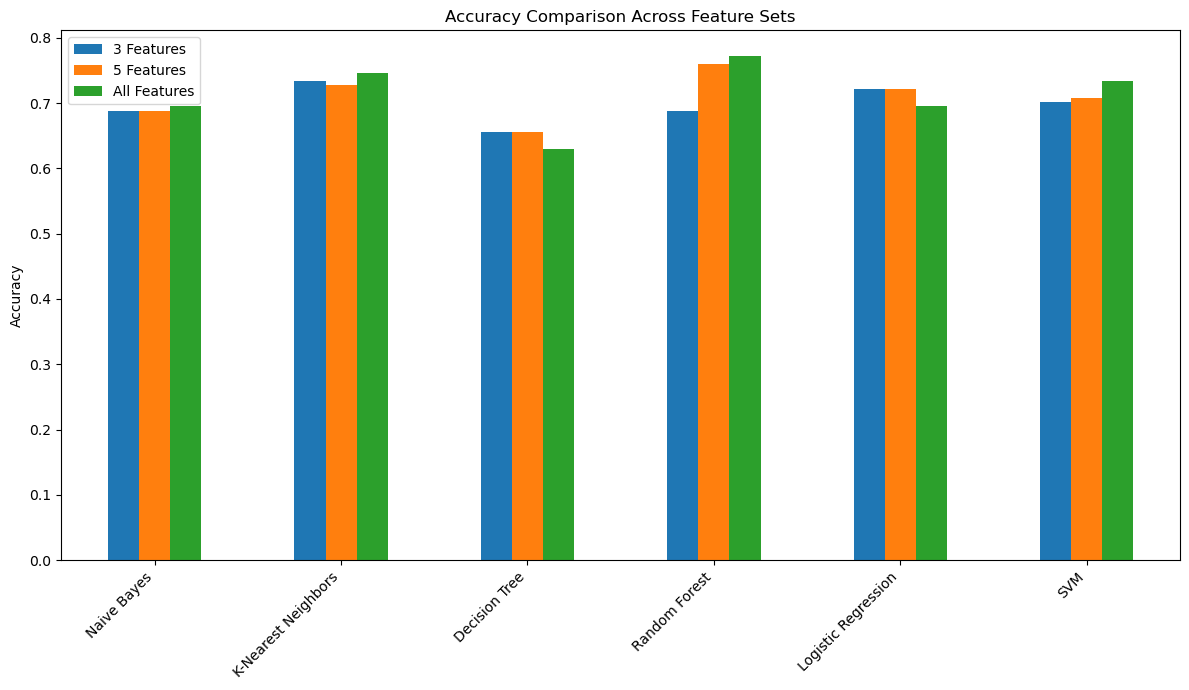


--- Precision ---
                     3 Features  5 Features  All Features
Naive Bayes            0.568182    0.555556      0.557377
K-Nearest Neighbors    0.651163    0.611111      0.647059
Decision Tree          0.511111    0.508772      0.471698
Random Forest          0.568182    0.654545      0.711111
Logistic Regression    0.627907    0.617021      0.577778
SVM                    0.605263    0.600000      0.644444


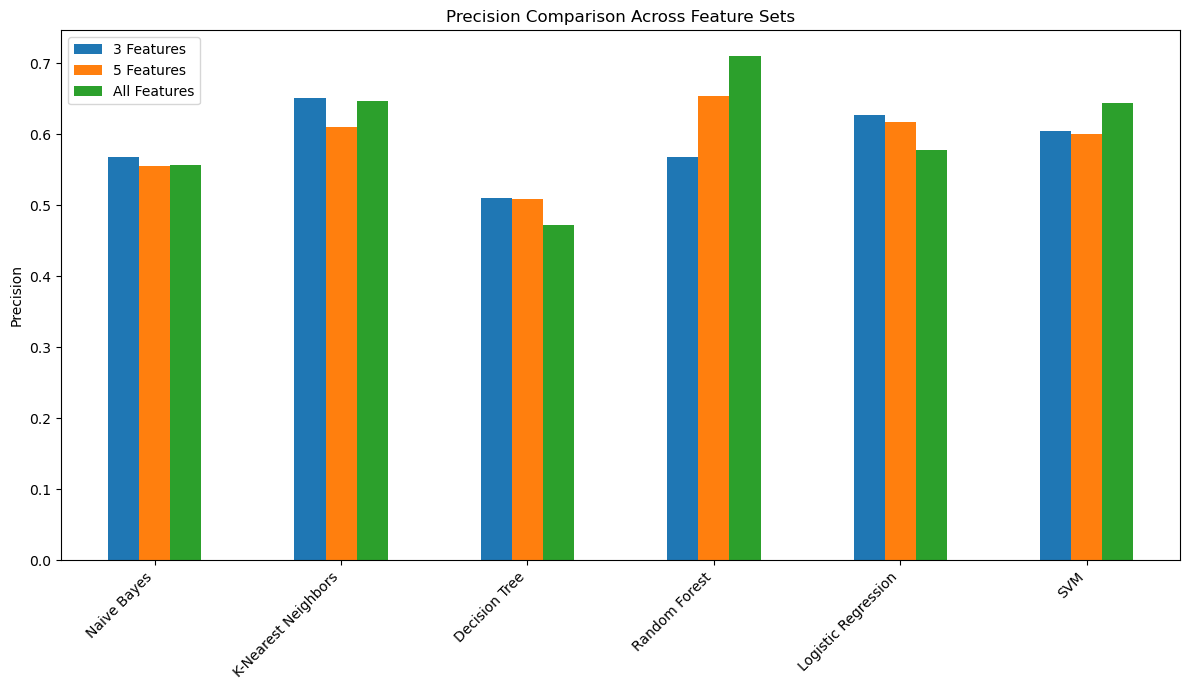


--- Recall ---
                     3 Features  5 Features  All Features
Naive Bayes            0.462963    0.555556      0.629630
K-Nearest Neighbors    0.518519    0.611111      0.611111
Decision Tree          0.425926    0.537037      0.462963
Random Forest          0.462963    0.666667      0.592593
Logistic Regression    0.500000    0.537037      0.481481
SVM                    0.425926    0.500000      0.537037


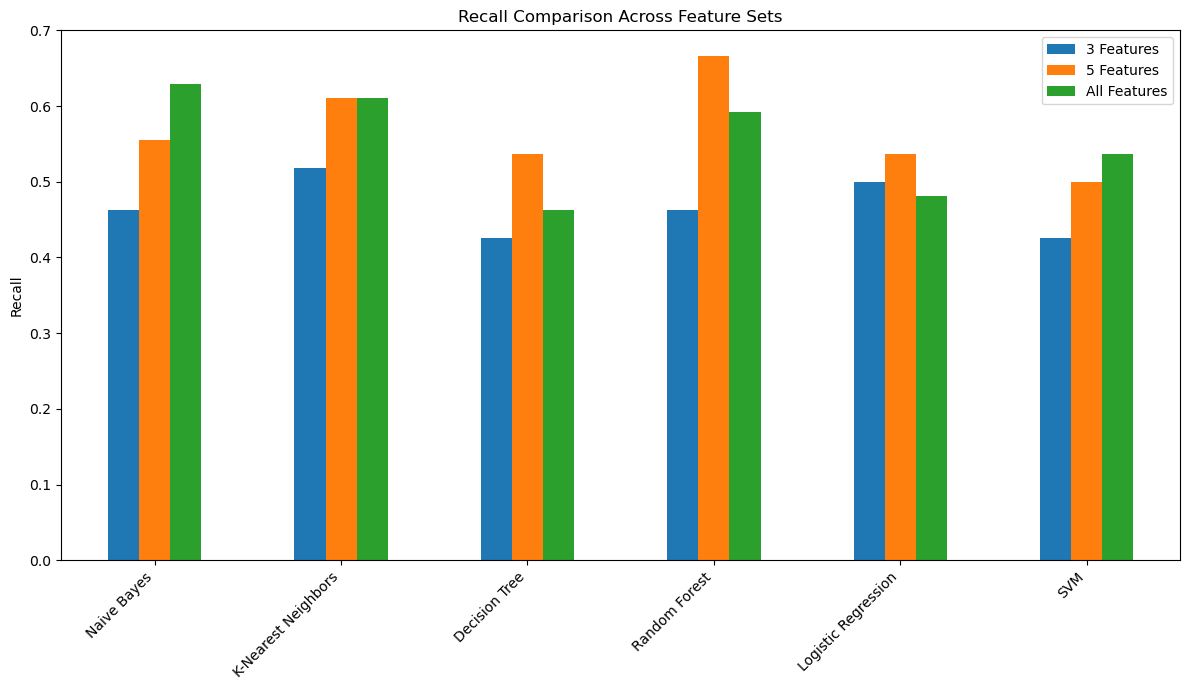


--- F1 ---
                     3 Features  5 Features  All Features
Naive Bayes            0.510204    0.555556      0.591304
K-Nearest Neighbors    0.577320    0.611111      0.628571
Decision Tree          0.464646    0.522523      0.467290
Random Forest          0.510204    0.660550      0.646465
Logistic Regression    0.556701    0.574257      0.525253
SVM                    0.500000    0.545455      0.585859


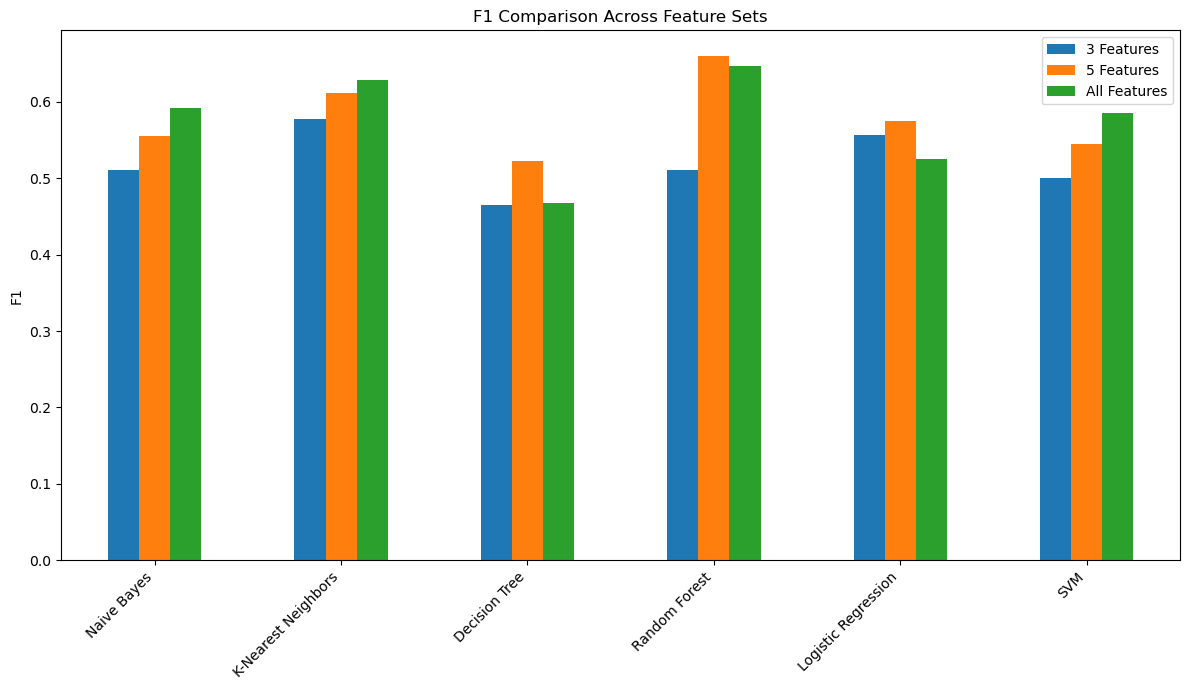

In [26]:
    print("\n--- Performance Comparison Across Feature Sets ---")
    for metric in ['accuracy', 'precision', 'recall', 'f1']:
        print(f"\n--- {metric.capitalize()} ---")
        metric_data = {}
        for fs_name in feature_sets:
            metric_data[fs_name] = {}
            for model_name in models:
                if fs_name in results_comparison and model_name in results_comparison[fs_name] and metric in results_comparison[fs_name][model_name]:
                    metric_data[fs_name][model_name] = results_comparison[fs_name][model_name][metric]
                else:
                    metric_data[fs_name][model_name] = float('nan') # Handle missing data

        df_metric = pd.DataFrame(metric_data)
        print(df_metric)
        df_metric.plot(kind='bar', figsize=(12, 7))
        plt.title(f'{metric.capitalize()} Comparison Across Feature Sets')
        plt.ylabel(metric.capitalize())
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

# Comparative Analysis for Notebook

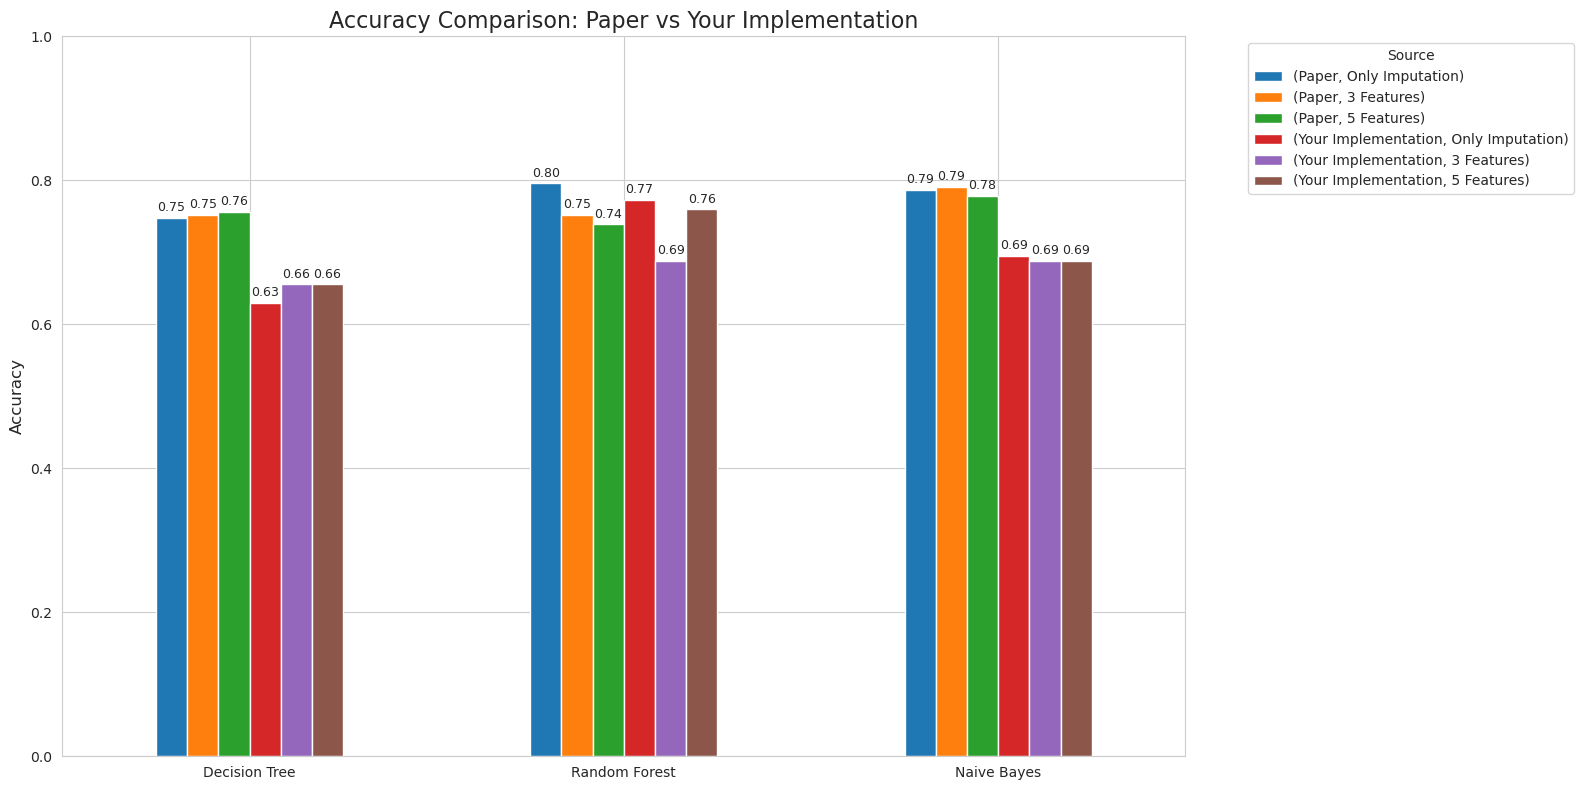

In [27]:
# Paper accuracy values
paper_accuracy = pd.DataFrame({
    'Only Imputation': {
        'Decision Tree': 0.7478,
        'Random Forest': 0.7957,
        'Naive Bayes': 0.7867
    },
    '3 Features': {
        'Decision Tree': 0.7522,
        'Random Forest': 0.7522,
        'Naive Bayes': 0.7913
    },
    '5 Features': {
        'Decision Tree': 0.7565,
        'Random Forest': 0.7391,
        'Naive Bayes': 0.7783
    }
})

# Your accuracy values — make sure these match your actual `results_comparison` dictionary
your_accuracy = pd.DataFrame({
    'Only Imputation': {
        'Decision Tree': results_comparison['All Features']['Decision Tree']['accuracy'],
        'Random Forest': results_comparison['All Features']['Random Forest']['accuracy'],
        'Naive Bayes': results_comparison['All Features']['Naive Bayes']['accuracy']
    },
    '3 Features': {
        'Decision Tree': results_comparison['3 Features']['Decision Tree']['accuracy'],
        'Random Forest': results_comparison['3 Features']['Random Forest']['accuracy'],
        'Naive Bayes': results_comparison['3 Features']['Naive Bayes']['accuracy']
    },
    '5 Features': {
        'Decision Tree': results_comparison['5 Features']['Decision Tree']['accuracy'],
        'Random Forest': results_comparison['5 Features']['Random Forest']['accuracy'],
        'Naive Bayes': results_comparison['5 Features']['Naive Bayes']['accuracy']
    }
})

# Combine into one dataframe for side-by-side comparison
accuracy_comparison = pd.concat(
    {
        'Paper': paper_accuracy,
        'Your Implementation': your_accuracy
    },
    axis=1
)

# Plotting
plt.figure(figsize=(16, 8))  # Adjust figure size for better readability

# Use Seaborn for enhanced styling
sns.set_style("whitegrid")
accuracy_comparison.plot(kind='bar', ax=plt.gca()) # Use current axes for seaborn style

plt.title('Accuracy Comparison: Paper vs Your Implementation', fontsize=16)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0, 1.0)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Source', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()

# Add value labels on top of the bars
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2., height + 0.005,
                 f'{height:.2f}',
                 ha='center', va='bottom', fontsize=9)

plt.show()

# Comparative Analysis for MLflow

In [28]:
with mlflow.start_run(run_name="Accuracy Comparison"):
    

    # Plotting
    plt.figure(figsize=(12, 6))
    sns.set_style("whitegrid")
    accuracy_comparison.plot(kind='bar', ax=plt.gca())

    plt.title('Accuracy Comparison: Paper vs Your Implementation', fontsize=16)
    plt.ylabel('Accuracy', fontsize=12)
    plt.ylim(0, 1.0)
    plt.xticks(rotation=0, fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(title='Source', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
    plt.tight_layout()

    # Save the plot as an image artifact
    plt.savefig("accuracy_comparison_plot.png")
    mlflow.log_artifact("accuracy_comparison_plot.png")
    plt.close() # Close the plot to free up resources

    # Add value labels on top of the bars (optional, but can be helpful)
    # fig, ax = plt.subplots(figsize=(16, 8))
    # sns.set_style("whitegrid")
    # accuracy_comparison.plot(kind='bar', ax=ax)
    # ax.set_title('Accuracy Comparison: Paper vs Your Implementation', fontsize=16)
    # ax.set_ylabel('Accuracy', fontsize=12)
    # ax.set_ylim(0, 1.0)
    # ax.tick_params(axis='x', rotation=0, fontsize=10)
    # ax.tick_params(axis='y', fontsize=10)
    # ax.legend(title='Source', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
    # for p in ax.patches:
    #     height = p.get_height()
    #     ax.text(p.get_x() + p.get_width() / 2., height + 0.005,
    #             f'{height:.2f}',
    #             ha='center', va='bottom', fontsize=9)
    # plt.tight_layout()
    # plt.savefig("accuracy_comparison_plot_with_values.png")
    # mlflow.log_artifact("accuracy_comparison_plot_with_values.png")
    # plt.close(fig)

print(f"MLflow run for accuracy comparison logged to: http://mlflow:5000")

🏃 View run Accuracy Comparison at: http://mlflow:5000/#/experiments/766733439696880257/runs/f6ff532cb7d24836be54cb7a43e20c5c
🧪 View experiment at: http://mlflow:5000/#/experiments/766733439696880257
MLflow run for accuracy comparison logged to: http://mlflow:5000


In [30]:
from sklearn.decomposition import PCA # Import PCA


if mlflow.active_run():
    mlflow.end_run()

with mlflow.start_run(run_name="Pima Diabetes Analysis with PCA"):
    results_comparison = {}
    feature_sets = {
        '3 Features (KBest)': 3,
        '5 Features (KBest)': 5,
        '3 Components (PCA)': 3,
        '5 Components (PCA)': 5,
        'All Features': X_train.shape[1]
    }
    models = {
        'Naive Bayes': GaussianNB(),
        'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=7),
        'Decision Tree': DecisionTreeClassifier(criterion='entropy', random_state=42),
        'Random Forest': RandomForestClassifier(n_estimators=50, random_state=42),
        'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
        'SVM': SVC(probability=True, random_state=42)
    }

    for fs_name, n_features in feature_sets.items():
        mlflow.set_tag("feature_set", fs_name)
        print(f"\n--- Evaluating with {fs_name} ---")

        X_train_processed = None
        X_test_processed = None
        current_explained_variance_ratio = None # Variable to temporarily hold explained variance

        if 'KBest' in fs_name:
            selector = SelectKBest(score_func=f_classif, k=n_features)
            X_train_selected = selector.fit_transform(X_train, y_train)
            X_test_selected = selector.transform(X_test)

            scaler_fs = StandardScaler()
            X_train_processed = scaler_fs.fit_transform(X_train_selected)
            X_test_processed = scaler_fs.transform(X_test_selected)

        elif 'PCA' in fs_name:
            scaler_pca = StandardScaler()
            X_train_scaled_for_pca = scaler_pca.fit_transform(X_train)
            X_test_scaled_for_pca = scaler_pca.transform(X_test)

            pca = PCA(n_components=n_features)
            X_train_processed = pca.fit_transform(X_train_scaled_for_pca)
            X_test_processed = pca.transform(X_test_scaled_for_pca)
            # Store explained variance ratio in the temporary variable
            current_explained_variance_ratio = pca.explained_variance_ratio_.sum()

        else: # All Features
            scaler_fs = StandardScaler()
            X_train_processed = scaler_fs.fit_transform(X_train)
            X_test_processed = scaler_fs.transform(X_test)

        results_comparison[fs_name] = {}

        for model_name, model in models.items():
            with mlflow.start_run(run_name=f"{model_name} - {fs_name}", nested=True):
                mlflow.log_param("n_features", n_features)
                mlflow.log_param("feature_set_name", fs_name)
                mlflow.log_param("model_name", model_name)

                # Log explained_variance_ratio ONLY if it's a PCA run
                if 'PCA' in fs_name and current_explained_variance_ratio is not None:
                    mlflow.log_param("explained_variance_ratio", current_explained_variance_ratio)

                try:
                    # For models that require scaling (LR, SVM, KNN), use the scaled data
                    if model_name in ['Logistic Regression', 'SVM', 'K-Nearest Neighbors']:
                        model.fit(X_train_processed, y_train)
                        y_pred = model.predict(X_test_processed)
                    else:
                        model.fit(X_train_processed, y_train)
                        y_pred = model.predict(X_test_processed)

                    acc = accuracy_score(y_test, y_pred)
                    prec = precision_score(y_test, y_pred)
                    rec = recall_score(y_test, y_pred)
                    f1 = f1_score(y_test, y_pred)

                    mlflow.log_metric("accuracy", acc)
                    mlflow.log_metric("precision", prec)
                    mlflow.log_metric("recall", rec)
                    mlflow.log_metric("f1_score", f1)
                    mlflow.sklearn.log_model(model, f"{model_name.replace(' ', '_')}_{fs_name.replace(' ', '_')}")

                    cm = confusion_matrix(y_test, y_pred)
                    plt.figure(figsize=(8, 6))
                    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                                xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
                    plt.xlabel('Predicted Label')
                    plt.ylabel('True Label')
                    plt.title(f'Confusion Matrix - {model_name} - {fs_name}')
                    mlflow.log_figure(plt.gcf(), f"confusion_matrix_{model_name.replace(' ', '_')}_{fs_name.replace(' ', '_')}.png")
                    plt.close()

                    if fs_name not in results_comparison:
                        results_comparison[fs_name] = {}
                    results_comparison[fs_name][model_name] = {
                        'accuracy': acc,
                        'precision': prec,
                        'recall': rec,
                        'f1': f1
                    }

                except Exception as e:
                    print(f"Error during model evaluation ({model_name} - {fs_name}): {e}")

    # --- Performance Comparison Across Feature Sets ---
    print("\n--- Performance Comparison Across Feature Sets ---")
    for metric in ['accuracy', 'precision', 'recall', 'f1']:
        print(f"\n--- {metric.capitalize()} ---")
        metric_data = {}
        for fs_name in feature_sets:
            metric_data[fs_name] = {}
            for model_name in models:
                if fs_name in results_comparison and model_name in results_comparison[fs_name] and metric in results_comparison[fs_name][model_name]:
                    metric_data[fs_name][model_name] = results_comparison[fs_name][model_name][metric]
                else:
                    metric_data[fs_name][model_name] = float('nan') # Handle missing data

        df_metric = pd.DataFrame(metric_data)
        print(df_metric)

        # Generate and log the comparison plot to MLflow
        plt.figure(figsize=(12, 7))
        df_metric.plot(kind='bar', figsize=(12, 7))
        plt.title(f'{metric.capitalize()} Comparison Across Feature Sets')
        plt.ylabel(metric.capitalize())
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        mlflow.log_figure(plt.gcf(), f"{metric}_comparison_across_feature_sets.png")
        plt.close()


--- Evaluating with 3 Features (KBest) ---


2025/06/02 10:49:08 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Naive Bayes - 3 Features (KBest) at: http://mlflow:5000/#/experiments/766733439696880257/runs/cbe052ae281a4b5ea64e81fb1fa55d78
🧪 View experiment at: http://mlflow:5000/#/experiments/766733439696880257


2025/06/02 10:49:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run K-Nearest Neighbors - 3 Features (KBest) at: http://mlflow:5000/#/experiments/766733439696880257/runs/f8e6b1a5fed14d1f981a255abf5ef7a2
🧪 View experiment at: http://mlflow:5000/#/experiments/766733439696880257


2025/06/02 10:49:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Decision Tree - 3 Features (KBest) at: http://mlflow:5000/#/experiments/766733439696880257/runs/191bc528ae6b49158e0ea31c3a0bc26b
🧪 View experiment at: http://mlflow:5000/#/experiments/766733439696880257


2025/06/02 10:49:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Random Forest - 3 Features (KBest) at: http://mlflow:5000/#/experiments/766733439696880257/runs/be3611f2470a4b07b7771e6193aae041
🧪 View experiment at: http://mlflow:5000/#/experiments/766733439696880257


2025/06/02 10:49:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Logistic Regression - 3 Features (KBest) at: http://mlflow:5000/#/experiments/766733439696880257/runs/13d721d6c3584fdc835cc26408947cee
🧪 View experiment at: http://mlflow:5000/#/experiments/766733439696880257


2025/06/02 10:49:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run SVM - 3 Features (KBest) at: http://mlflow:5000/#/experiments/766733439696880257/runs/42b0bbe2d2474fbcb4e87bc235134620
🧪 View experiment at: http://mlflow:5000/#/experiments/766733439696880257

--- Evaluating with 5 Features (KBest) ---


2025/06/02 10:49:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Naive Bayes - 5 Features (KBest) at: http://mlflow:5000/#/experiments/766733439696880257/runs/9ef6adbf811847628a15373c6ced55ec
🧪 View experiment at: http://mlflow:5000/#/experiments/766733439696880257


2025/06/02 10:49:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run K-Nearest Neighbors - 5 Features (KBest) at: http://mlflow:5000/#/experiments/766733439696880257/runs/560eb86df0a444878153de80a38d08a3
🧪 View experiment at: http://mlflow:5000/#/experiments/766733439696880257


2025/06/02 10:49:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Decision Tree - 5 Features (KBest) at: http://mlflow:5000/#/experiments/766733439696880257/runs/21c7a7580c644cc19d00d81dd4908024
🧪 View experiment at: http://mlflow:5000/#/experiments/766733439696880257


2025/06/02 10:49:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Random Forest - 5 Features (KBest) at: http://mlflow:5000/#/experiments/766733439696880257/runs/d605c795b43349588aa08efd8afdf5e1
🧪 View experiment at: http://mlflow:5000/#/experiments/766733439696880257


2025/06/02 10:50:02 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Logistic Regression - 5 Features (KBest) at: http://mlflow:5000/#/experiments/766733439696880257/runs/bd0134e8f6a147cd890c6dc65f3a425c
🧪 View experiment at: http://mlflow:5000/#/experiments/766733439696880257


2025/06/02 10:50:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run SVM - 5 Features (KBest) at: http://mlflow:5000/#/experiments/766733439696880257/runs/ecbd51def1cc42a281fecdf67623bd29
🧪 View experiment at: http://mlflow:5000/#/experiments/766733439696880257

--- Evaluating with 3 Components (PCA) ---


2025/06/02 10:50:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Naive Bayes - 3 Components (PCA) at: http://mlflow:5000/#/experiments/766733439696880257/runs/4478c6f1835f4e748eb01888bafb060c
🧪 View experiment at: http://mlflow:5000/#/experiments/766733439696880257


2025/06/02 10:50:17 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run K-Nearest Neighbors - 3 Components (PCA) at: http://mlflow:5000/#/experiments/766733439696880257/runs/9f79987e5c1e42c286dcd4ff10b38edb
🧪 View experiment at: http://mlflow:5000/#/experiments/766733439696880257


2025/06/02 10:50:23 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Decision Tree - 3 Components (PCA) at: http://mlflow:5000/#/experiments/766733439696880257/runs/43d89dcb51d34d998dee6c66d8ed8cb7
🧪 View experiment at: http://mlflow:5000/#/experiments/766733439696880257


2025/06/02 10:50:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Random Forest - 3 Components (PCA) at: http://mlflow:5000/#/experiments/766733439696880257/runs/739a97ee955a4458a533de8994010f1f
🧪 View experiment at: http://mlflow:5000/#/experiments/766733439696880257


2025/06/02 10:50:33 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Logistic Regression - 3 Components (PCA) at: http://mlflow:5000/#/experiments/766733439696880257/runs/8f8952a1a5c64a859cb4c9d9cfca34a7
🧪 View experiment at: http://mlflow:5000/#/experiments/766733439696880257


2025/06/02 10:50:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run SVM - 3 Components (PCA) at: http://mlflow:5000/#/experiments/766733439696880257/runs/003ceb2c698f4ac4b3ad97c81b788298
🧪 View experiment at: http://mlflow:5000/#/experiments/766733439696880257

--- Evaluating with 5 Components (PCA) ---


2025/06/02 10:50:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Naive Bayes - 5 Components (PCA) at: http://mlflow:5000/#/experiments/766733439696880257/runs/dad1d28f147d47d2884ca7a52c419f53
🧪 View experiment at: http://mlflow:5000/#/experiments/766733439696880257


2025/06/02 10:50:46 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run K-Nearest Neighbors - 5 Components (PCA) at: http://mlflow:5000/#/experiments/766733439696880257/runs/8330b6f2ff7d4f43a213aebf11a3beb9
🧪 View experiment at: http://mlflow:5000/#/experiments/766733439696880257


2025/06/02 10:50:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Decision Tree - 5 Components (PCA) at: http://mlflow:5000/#/experiments/766733439696880257/runs/113d090ecbc3451ba335e6f4ac75a45c
🧪 View experiment at: http://mlflow:5000/#/experiments/766733439696880257


2025/06/02 10:50:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Random Forest - 5 Components (PCA) at: http://mlflow:5000/#/experiments/766733439696880257/runs/e78964f118c34ab79cae36263c705449
🧪 View experiment at: http://mlflow:5000/#/experiments/766733439696880257


2025/06/02 10:51:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Logistic Regression - 5 Components (PCA) at: http://mlflow:5000/#/experiments/766733439696880257/runs/912a9919984c40e0ad7decad91100259
🧪 View experiment at: http://mlflow:5000/#/experiments/766733439696880257


2025/06/02 10:51:05 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run SVM - 5 Components (PCA) at: http://mlflow:5000/#/experiments/766733439696880257/runs/1975dea9a2914322b7c4e16bdb2eb21b
🧪 View experiment at: http://mlflow:5000/#/experiments/766733439696880257

--- Evaluating with All Features ---


2025/06/02 10:51:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Naive Bayes - All Features at: http://mlflow:5000/#/experiments/766733439696880257/runs/df7c1edb1c694812a0bd83aaa90cfa11
🧪 View experiment at: http://mlflow:5000/#/experiments/766733439696880257


2025/06/02 10:51:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run K-Nearest Neighbors - All Features at: http://mlflow:5000/#/experiments/766733439696880257/runs/2cf09b890c3c402fb5cd7c5498eb03d4
🧪 View experiment at: http://mlflow:5000/#/experiments/766733439696880257


2025/06/02 10:51:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Decision Tree - All Features at: http://mlflow:5000/#/experiments/766733439696880257/runs/dbc118e21b2b4a86a182f21f185af03b
🧪 View experiment at: http://mlflow:5000/#/experiments/766733439696880257


2025/06/02 10:51:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Random Forest - All Features at: http://mlflow:5000/#/experiments/766733439696880257/runs/8fd33e880ac24ddf85f38c4a5cefea2e
🧪 View experiment at: http://mlflow:5000/#/experiments/766733439696880257


2025/06/02 10:51:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Logistic Regression - All Features at: http://mlflow:5000/#/experiments/766733439696880257/runs/01836fc712f44806948510c645a15ea2
🧪 View experiment at: http://mlflow:5000/#/experiments/766733439696880257


2025/06/02 10:51:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run SVM - All Features at: http://mlflow:5000/#/experiments/766733439696880257/runs/cc3cf67d857748a08a51103ad1f72ca5
🧪 View experiment at: http://mlflow:5000/#/experiments/766733439696880257

--- Performance Comparison Across Feature Sets ---

--- Accuracy ---
                     3 Features (KBest)  5 Features (KBest)  \
Naive Bayes                    0.688312            0.688312   
K-Nearest Neighbors            0.733766            0.727273   
Decision Tree                  0.655844            0.655844   
Random Forest                  0.688312            0.753247   
Logistic Regression            0.720779            0.720779   
SVM                            0.701299            0.707792   

                     3 Components (PCA)  5 Components (PCA)  All Features  
Naive Bayes                    0.675325            0.668831      0.694805  
K-Nearest Neighbors            0.714286            0.694805      0.746753  
Decision Tree                  0.707792            0.655844   

<Figure size 1200x700 with 0 Axes>

<Figure size 1200x700 with 0 Axes>

<Figure size 1200x700 with 0 Axes>

<Figure size 1200x700 with 0 Axes>

# CONCLUSION:

Analysis of "Pima Indians Diabetes Mellitus Classification Based on Machine Learning (ML) Algorithms" and Extended Implementation

This report details the analysis and extension of the research paper "Pima Indians diabetes mellitus classification based on machine learning (ML) algorithms." Conducted by Sumair Javed (SP25-RAI-019) and Iqra Rathore (SP25-RAI-018), this study aimed to replicate and expand upon the findings of the original paper.

1. The original research focused on the application of three machine learning algorithms for the classification of diabetes in the Pima Indians dataset: J48 Decision Tree, Random Forest, and Naive Bayes. In our extended implementation, we not only reproduced the evaluation of these three algorithms but also incorporated three additional classification models: Logistic Regression, K-Nearest Neighbors (KNN), and Support Vector Machines (SVM).

2. The performance of all six models was systematically evaluated across different feature subsets: the top 3 features, the top 5 features, and all available features within the dataset. We did PCA and Sklearn SelectkBest for Feature selection. The accuracy metrics for each model and feature set combination were meticulously tracked and visualized using the MLflow platform. This enabled a comprehensive comparison of model performance under varying input dimensionality.

Furthermore, a direct comparison was made between the accuracy results obtained in our implementation and those reported in the original research paper for the common algorithms (J48 Decision Tree, Random Forest, and Naive Bayes). The results of this comparison, also visualized using bar plots and logged in MLflow, indicated that the accuracy achieved in the original paper was generally superior to that of our implementation across the shared models and feature sets.

In conclusion, while our study successfully extended the original research by evaluating a broader range of classification algorithms and performing a detailed comparison across different feature sets, the observed discrepancy in accuracy compared to the original paper highlights the critical role of data preprocessing, dataset partitioning, and potentially subtle differences in the experimental setup. Further investigation into the specific methodologies employed in the original research would be necessary to pinpoint the exact reasons for the superior performance reported therein. The comprehensive tracking in MLflow provides a valuable platform for future experiments aimed at understanding and potentially bridging this performance gap.